# OpenCV: Image Processing

## Import dependencies

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Statement to display images inline and not in a separate window
%matplotlib inline

## Image Thresholding
---
### Simple Thresholding

>![](./doc-imgs/thresh-styles.png)

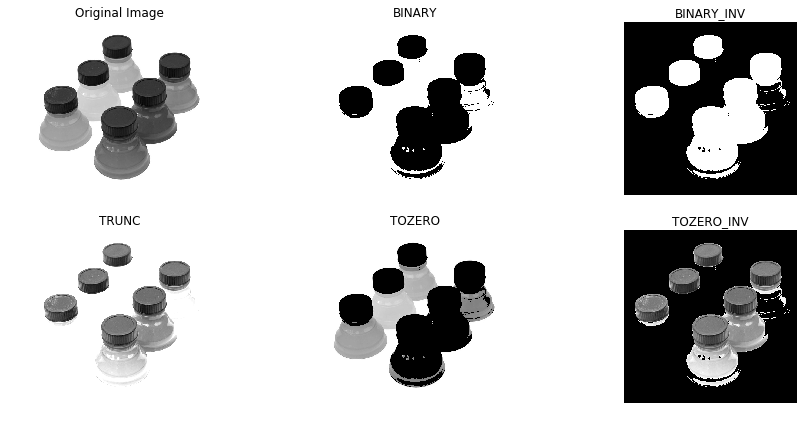

In [11]:
img = cv2.imread('./sample_imgs/bottle-cap.jpg',0)

ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(15,7))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()

### Adaptive Thresholding


>#### Adaptive Method

>*cv2.ADAPTIVE_THRESH_MEAN_C* :     threshold value is the mean of neighbourhood area.

>*cv2.ADAPTIVE_THRESH_GAUSSIAN_C* : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.


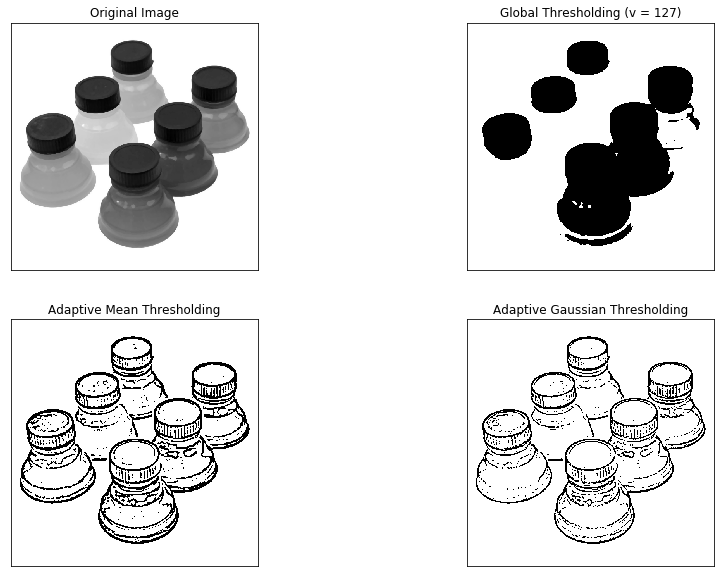

In [12]:
img = cv2.imread('./sample_imgs/bottle-cap.jpg',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

plt.figure(figsize=(15,10))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## 2D Convolution ( Image Filtering )

>Images can be filtered with various low-pass filters(LPF), high-pass filters(HPF) etc. LPF helps in removing noises, blurring the images etc. HPF filters helps in finding edges in the images.

>$$ K = \frac{1}{25} \begin{bmatrix} 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \end{bmatrix} $$

>Operation is like this: keep this kernel above a pixel, add all the 25 pixels below this kernel, take its average and replace the central pixel with the new average value. It continues this operation for all the pixels in the image

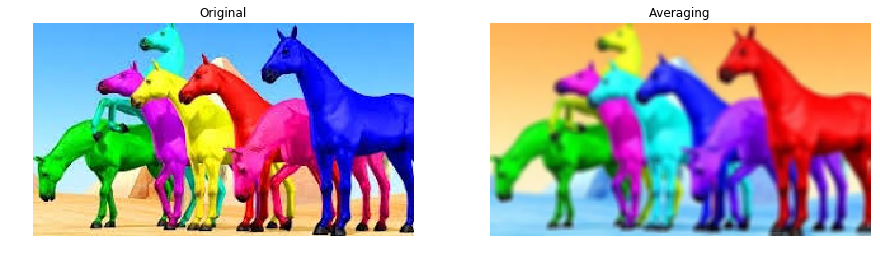

In [13]:
img = cv2.imread('./sample_imgs/horses.jpg',1)

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15, 15))
plt.subplot(121),plt.imshow(img),plt.title('Original'), plt.axis('off')
plt.subplot(122),plt.imshow(dst),plt.title('Averaging'),plt.axis('off')
plt.show()

## Image Gradients
>The gradient of the image is one of the fundamental building blocks in image processing. For example the Canny edge detector uses image gradient for edge detection

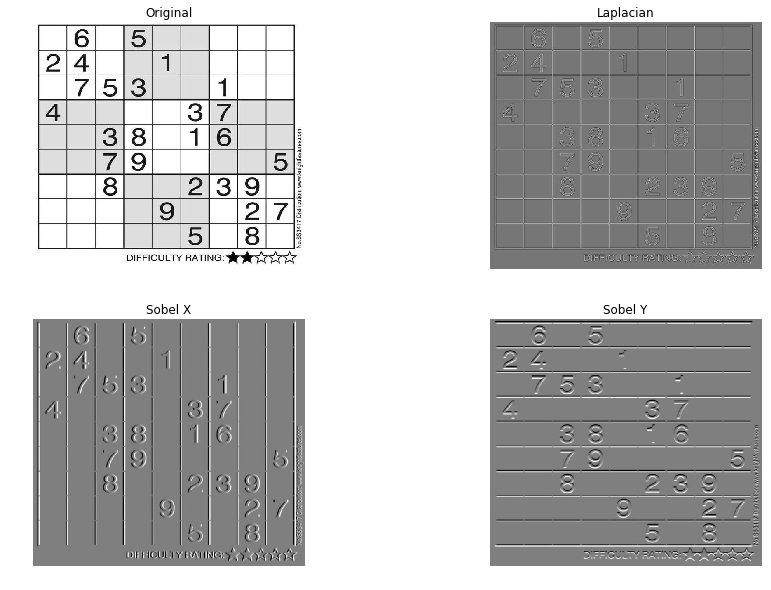

In [14]:
img = cv2.imread('./sample_imgs/sudoku.jpg',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.figure(figsize=(15, 10))
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray'),plt.title('Original'),plt.axis('off')
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray'),plt.title('Laplacian'),plt.axis('off')
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray'),plt.title('Sobel X'), plt.axis('off')
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray'),plt.title('Sobel Y'), plt.axis('off')

plt.show()

## Canny Edge Detection

>It is a multi-stage algorithm and consists of

>1. Noise Reduction
>2. Finding Intensity Gradient of the Image
>3. Non-maximum Suppression
>4. Hysteresis Thresholding

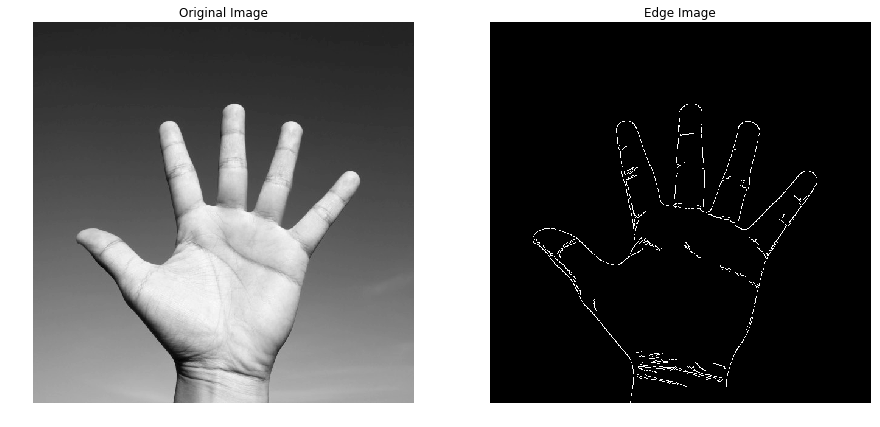

In [15]:
img = cv2.imread('./sample_imgs/hand.jpg',0)
edges = cv2.Canny(img,80,160)

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img,cmap = 'gray'),plt.title('Original Image'), plt.axis('off')
plt.subplot(122),plt.imshow(edges,cmap = 'gray'),plt.title('Edge Image'), plt.axis('off')

plt.show()

## Histograms
>Histogram is a graph or plot, which gives you an overall idea about the intensity distribution of an image. It is a plot with pixel values in X-axis and corresponding number of pixels in the image on Y-axis.

/home/user/.local/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


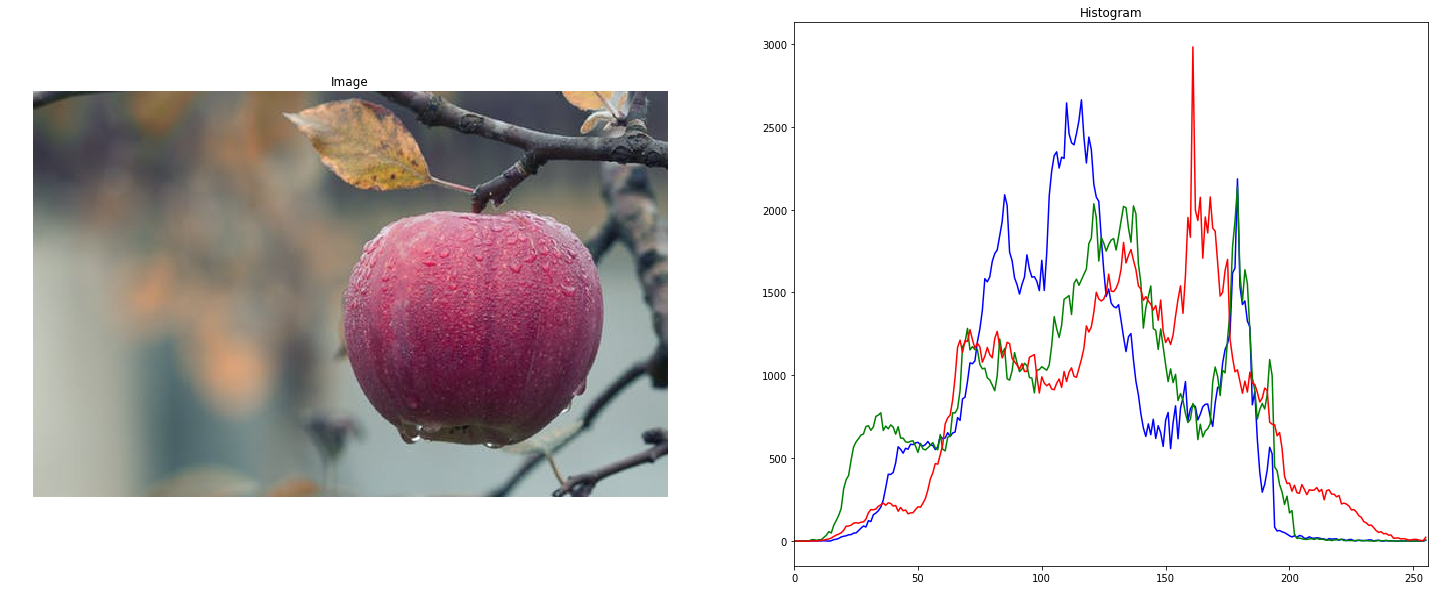

In [16]:
img = cv2.imread('./sample_imgs/apple.jpg')
color = ('b','g','r')

plt.figure(figsize=(25, 10))

for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.subplot(122),plt.plot(histr, color = col), plt.xlim([0,256]), plt.title('Histogram')
    
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(img),plt.title('Image'), plt.axis('off')
plt.show()

## Histogram Equalisation

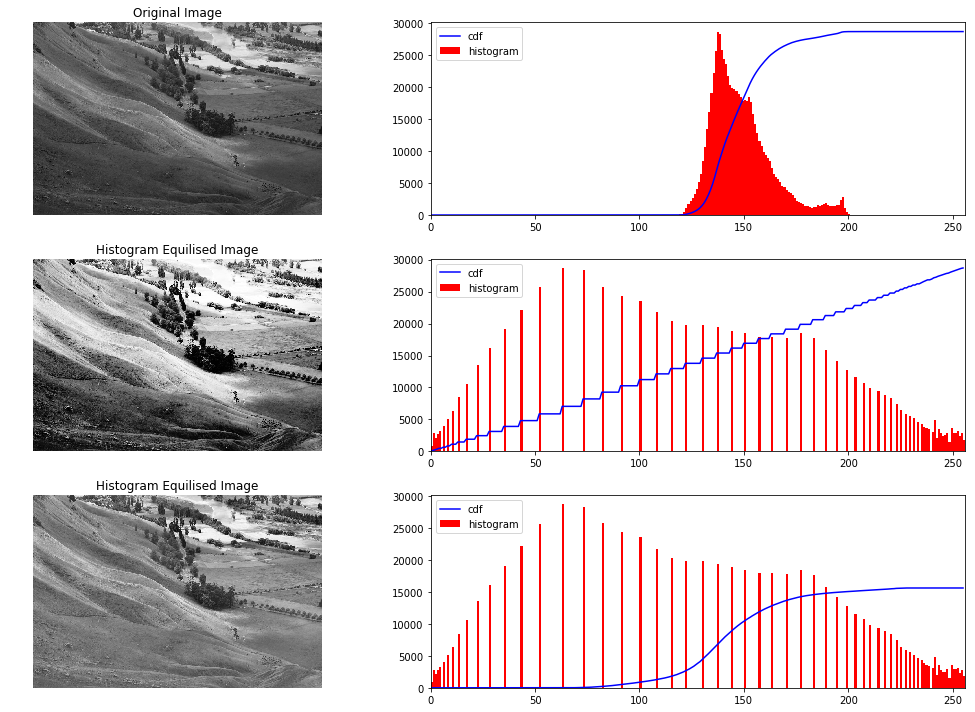

In [17]:
img = cv2.imread('./sample_imgs/valley.jpg',0)


# Original Image
#-------------------------------------------------------------------------------------

hist = cv2.calcHist([img],[0],None,[256],[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.figure(figsize=(15, 10))

plt.subplot(322)
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')

plt.subplot(321),plt.imshow(img, cmap='gray'),plt.title('Original Image'), plt.axis('off')


#----------------------------------------------------------------------------------------
# Histogram Equilised Image [Global Contrast]
#----------------------------------------------------------------------------------------

img_his_eq = cv2.equalizeHist(img)

hist = cv2.calcHist([img_his_eq],[0],None,[256],[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.subplot(324)
plt.plot(cdf_normalized, color = 'b')
plt.hist(img_his_eq.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')

plt.subplot(323),plt.imshow(img_his_eq, cmap='gray'),plt.title('Histogram Equilised Image'), plt.axis('off')


#----------------------------------------------------------------------------------------
# CLAHE (Contrast Limited Adaptive Histogram Equalization)
#----------------------------------------------------------------------------------------

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_his_eq_clahe = clahe.apply(img)

hist = cv2.calcHist([img_his_eq_clahe],[0],None,[256],[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.subplot(326)
plt.plot(cdf_normalized, color = 'b')
plt.hist(img_his_eq.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')

plt.subplot(325),plt.imshow(img_his_eq_clahe, cmap='gray'),plt.title('Histogram Equilised Image'), plt.axis('off')


plt.tight_layout()
plt.show()

## Template Matching

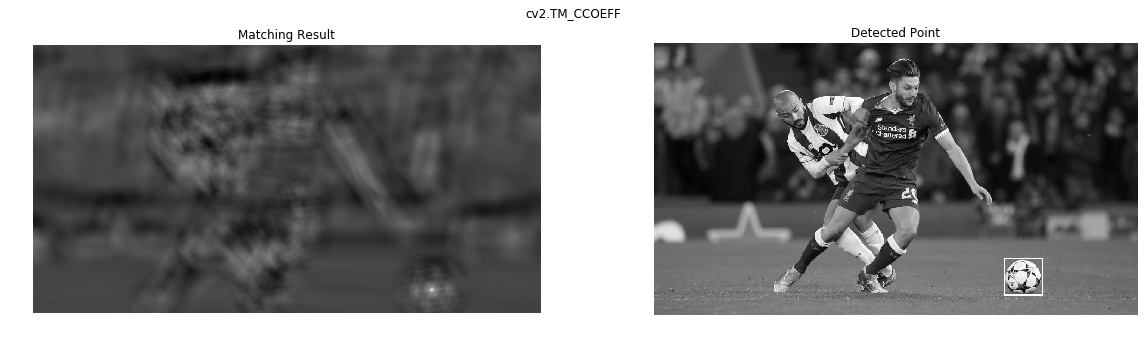

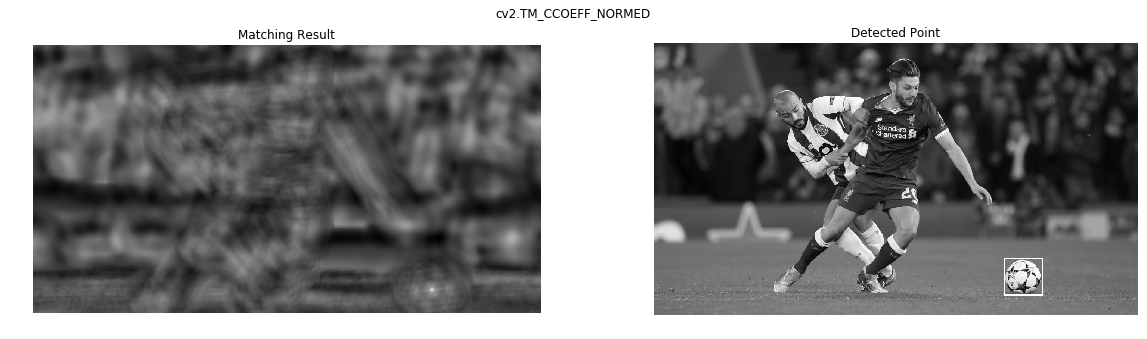

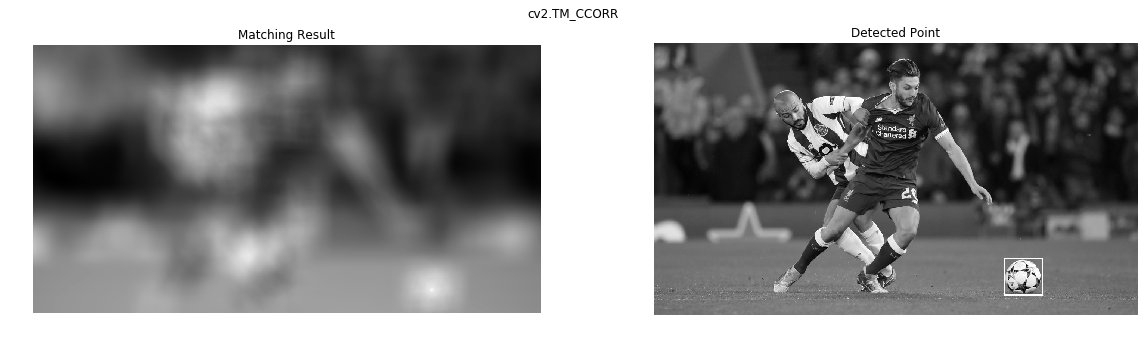

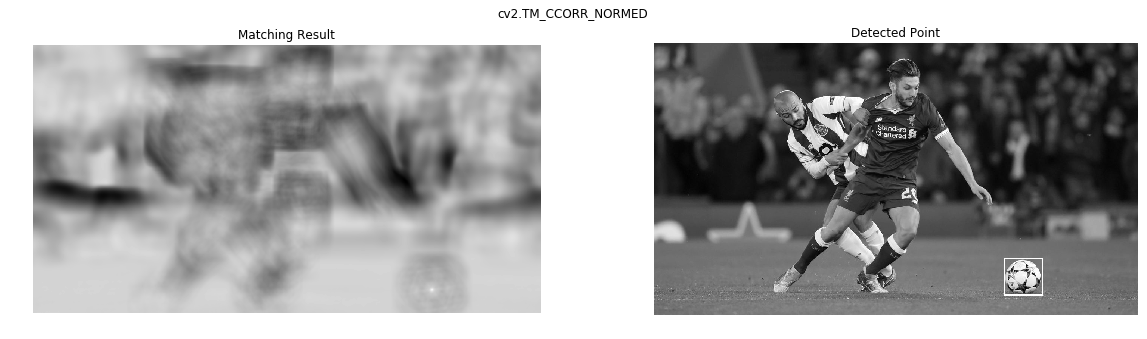

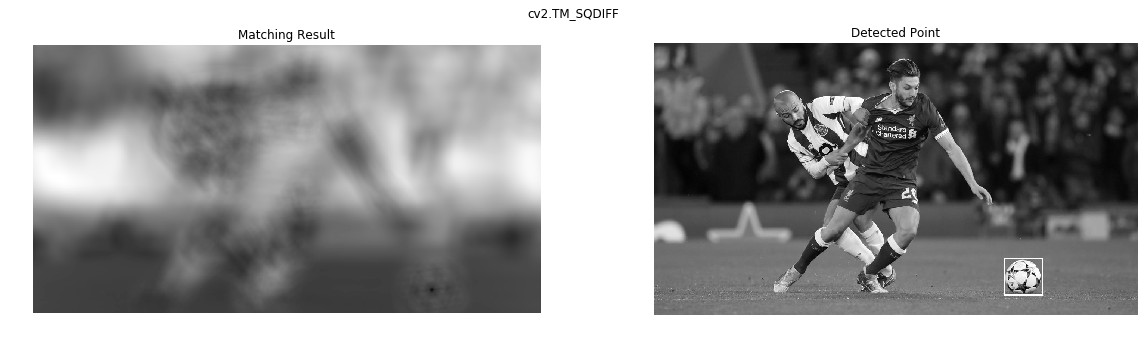

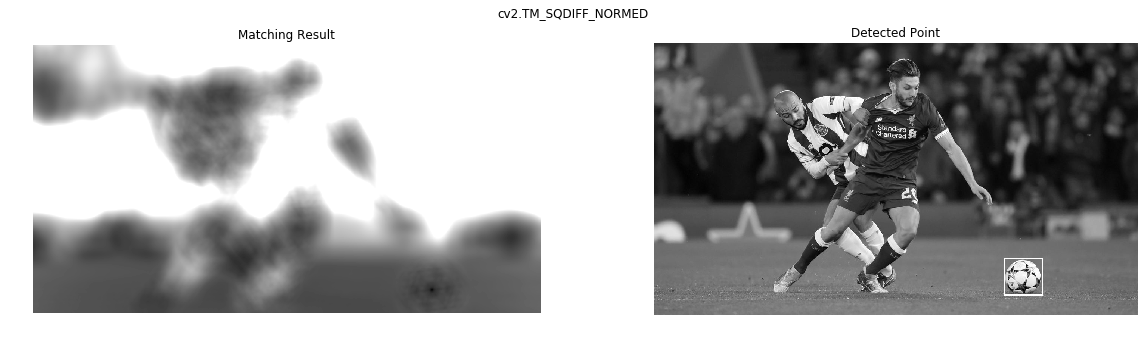

In [18]:
img = cv2.imread('./sample_imgs/football.jpg',0)
img2 = img.copy()
template = cv2.imread('./sample_imgs/football-template.jpg',0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']


for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    
    plt.figure(figsize=(20,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray'), plt.title('Matching Result'), plt.axis('off')
    plt.subplot(122),plt.imshow(img,cmap = 'gray'), plt.title('Detected Point'),plt.axis('off')
    plt.suptitle(meth)

    plt.show()